In [1]:
# setup
from sympy import *
x,y,z,p,t=symbols('x y z p t',real=True)
init_printing()
%matplotlib notebook
%load_ext tikzmagic

In [260]:
d_m, D_m, d_e, D_e, d_s, D_s, d_o = symbols('d_m, D_m, d_e, D_e, d_s, D_s, d_o')

Source: technical notes 11 and 12 from To Explain The World by Steven Weinberg

# Aristarchus

Made 4 basic naked eye astronomical observations about the sun and moon to calculate the *ratios* of the diameter and distance of the earth, moon and sun. The absolute values of these measurements required a single starting value - see Eratosthenes. 

In [261]:
obs1angle = 89.853
obs4angle = 0.5
alexandriaangle = 7.2

## Observation 1

When the moon is half full the angle between the lines of sight from the earth to the moon and to the sun is 89.853 degrees.

![Observation3](img/halfmoon.svg)

In [262]:
obs1angle

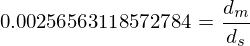

In [263]:
obs1eq1=Eq(cos(obs1angle*pi/180).evalf(),d_m/d_s);obs1eq1

In [264]:
1/obs1eq1.lhs

## Observation 2

The moon just covers the disc of the sun during a solar eclipse

![Observation2](img/solareclipse.svg)

From similar triangles

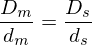

In [265]:
obs2eq1 = Eq(D_m/d_m, D_s/d_s); obs2eq1

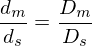

In [266]:
obs2eq2 = Eq(d_m/d_s, solve(obs2eq1, d_m)[0]/d_s); obs2eq2

And from observation 1

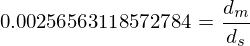

In [267]:
obs1eq1

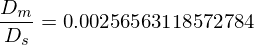

In [268]:
obs2eq3 = Eq(D_m/D_s, obs1eq1.lhs); obs2eq3

## Observation 3

The earth casts a shadow that is twice the diameter of the moon

![Observation3](img/lunareclipse.svg)

From similar trianges we have 
$$\frac{d_s + d_m + d_o}{D_s} = \frac{d_m+d_o}{D_e} = \frac{d_o}{2D_m}$$

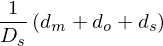

In [269]:
obs3eq1 = (d_s+d_m+d_o)/D_s; obs3eq1

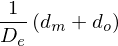

In [270]:
obs3eq2 = (d_m + d_o)/D_e; obs3eq2

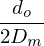

In [271]:
obs3eq3 = d_o / (2*D_m); obs3eq3

Solve for $d_o$

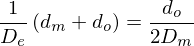

In [272]:
obs3eq4 = Eq(obs3eq2,obs3eq3); obs3eq4

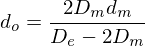

In [273]:
obs3doeq = solve(obs3eq4, d_o)[0]; Eq(d_o,obs3doeq)

subsitute $d_o$ into eq3

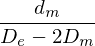

In [274]:
obs3eq3 = obs3eq3.subs({d_o:obs3doeq}); obs3eq3

Multiply eq1--eq3 by the demoninators

In [275]:
denominators = D_s*D_e*(D_e-2*D_m); denominators

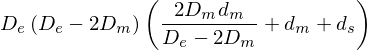

In [276]:
obs3eq1b = obs3eq1.subs({d_o:obs3doeq}) * denominators; obs3eq1b

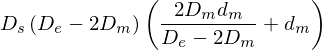

In [277]:
obs3eq2b = obs3eq2.subs({d_o:obs3doeq}) * denominators; obs3eq2b

Solve for $D_e$

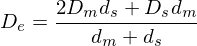

In [278]:
obs3Deeq = solve(Eq(obs3eq1b,obs3eq2b), D_e)[1]; Eq(D_e,obs3Deeq)

From observation 2 we have $\frac{d_s}{d_m} = \frac{D_s}{D_m}$

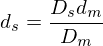

In [279]:
obs3dseq = solve(Eq(d_s/d_m,D_s/D_m), d_s)[0]; Eq(d_s,obs3dseq)

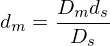

In [280]:
obs3dmeq = solve(Eq(d_s/d_m,D_s/D_m), d_m)[0]; Eq(d_m,obs3dmeq)

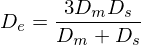

In [281]:
obs3Deeq2 = obs3Deeq.subs({d_s:obs3dseq}).simplify(); Eq(D_e, obs3Deeq2)

From observation 2

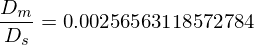

In [282]:
obs2eq3

In [283]:
obs3DeDs = Eq(D_e, obs3Deeq2.subs({D_m: solve(obs2eq3, D_m)[0]})); obs3DeDs

In [284]:
obs3DsDe = Eq(D_s,solve(obs3DeDs,D_s)[0]); obs3DsDe

In [285]:
obs3DeDm = Eq(D_e, obs3Deeq2.subs({D_s:solve(obs2eq3, D_s)[0]})); obs3DeDm

## Observation 4

The moon subtends an angle of 0.5 degrees in the sky

![observatino4](img/moonangle.svg)

In [286]:
obs4angle

In [287]:
obs4eq1 = Eq(D_m, ((obs4angle/360)*2*pi).evalf(5)*d_m); obs4eq1

## Eratosthenes size of the earth

Eratosthenese observed in Syene that at midday on the summer solstice the sun reached the bottom of a vertical well - indicating that the sun was directly overhead. At the same time 800km to the north in Alexandria the sun cast a 7.2 degree shadow. 

![eratosthenes](img/eratosthenes.svg)

In [288]:
alexandriaangle

In [289]:
c_e = 360/alexandriaangle*800; c_e

In [290]:
Deabs = c_e/pi
Eq(D_e, Deabs.evalf())

## Absolute values

Now feed Eratosthenes value of $D_e$ into Aristarchus's ratios to calculate $d_m$ and $d_s$ and $D_m$ and $D_s$

From observation 3 (which is dependent on observation 2 which is dependent on observation 1)

In [291]:
[obs3DeDs, obs3DeDm]

In [292]:
Dsabs = solve(obs3DeDs.subs({D_e:Deabs}), D_s)[0]
Eq(D_s ,Dsabs)

In [293]:
Dmabs = solve(obs3DeDm.subs({D_e:Deabs}), D_m)[0]
Eq(D_m ,Dmabs)

From observation 4

In [294]:
obs4eq1

In [295]:
dmabs = solve(obs4eq1.subs({D_m: Dmabs}), d_m)[0]
Eq(d_m, dmabs)

From observation 1

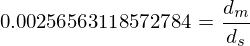

In [296]:
obs1eq1

In [297]:
dsabs = solve(obs1eq1.subs({d_m:dmabs}), d_s)[0]
Eq(d_s, dsabs)